In [2]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [4]:
xl = pd.read_excel('Players.xlsx')
teams = pd.read_csv("teams.csv")
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv("teamwise_home_and_away.csv")
most_runs_average_strikerate = pd.read_csv("most_runs_average_strikerate.csv")

In [5]:
print("No. of teams: ",teams['team1'].nunique())
teams['team1'].unique()
print(teams.info())

No. of teams:  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes
None


In [6]:
print(deliveries.info())
deliveries.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

match_id  inning         batting_team    bowling_team  over  ball  \
179073     11415       2  Chennai Super Kings  Mumbai Indians    20     2   
179074     11415       2  Chennai Super Kings  Mumbai Indians    20     3   
179075     11415       2  Chennai Super Kings  Mumbai Indians    20     4   
179076     11415       2  Chennai Super Kings  Mumbai Indians    20     5   
179077     11415       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
179073  RA Jadeja   SR Watson  SL Malinga              0  ...         0   
179074  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179075  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179076  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179073            0            0             0             1           0   
179074            0            0             0             2           0   
179075            0            0             0             1           0   
179076            0            0             0             2           0   
179077            0            0             0             0           0   

        total_runs  player_dismissed dismissal_kind    fielder  
179073           1               NaN            NaN        NaN  
179074           2               NaN            NaN        NaN  
179075           1         SR Watson        run out  KH Pandya  
179076           2               NaN            NaN        NaN  
179077           0         SN Thakur            lbw        NaN  

[5 rows x 21 columns]

In [7]:
print(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

id    Season       city       date                        team1  \
0   1  IPL-2017  Hyderabad 2017-05-04          Sunrisers Hyderabad   
1   2  IPL-2017       Pune 2017-06-04               Mumbai Indians   
2   3  IPL-2017     Rajkot 2017-07-04                Gujarat Lions   
3   4  IPL-2017     Indore 2017-08-04       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore 2017-08-04  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [8]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


In [9]:
print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

ump_set1 = set(matches['umpire1'].unique())               
ump_set2 = set(matches['umpire2'].unique())
ump_set3 = set(matches['umpire3'].unique())
all_set = ump_set1.intersection(ump_set2)
all_set = all_set.intersection(ump_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_set, len(all_set))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'Nitin Menon', 'Vineet Kulkarni', 'Nanda Kishore', 'KN Ananthapadmanabhan', 'Nigel Llong', 'C Shamshuddin', 'A Nanda Kishore', 'Kumar Dharmasena', 'Chris Gaffaney', 'Rod Tucker', 'Anil Dandekar', 'Ulhas Gandhe', 'Ian Gould', 'Yeshwant Barde', 'S Ravi', 'O Nandan', 'Anil Chaudhary', 'Bruce Oxenford', 'K Ananthapadmanabhan'} 20


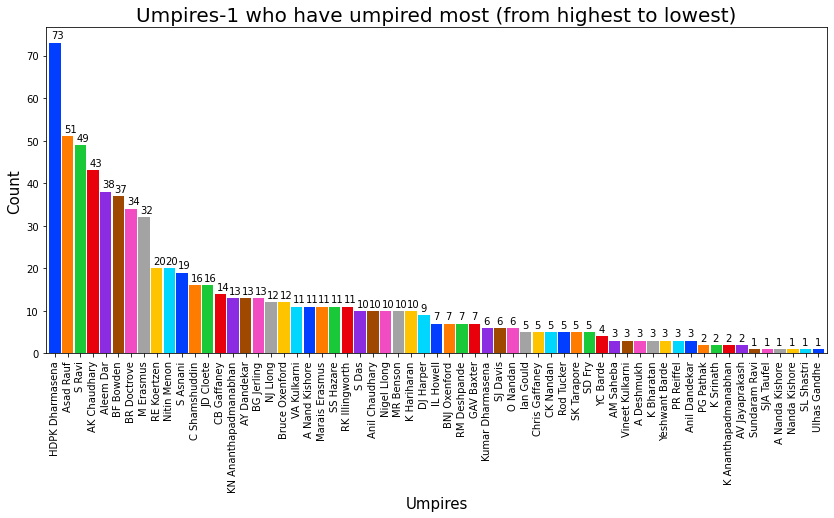

In [10]:
plt.subplots(figsize=(14,6))
ax=matches['umpire1'].value_counts().plot.bar(width=0.9,color=sns.color_palette('bright',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

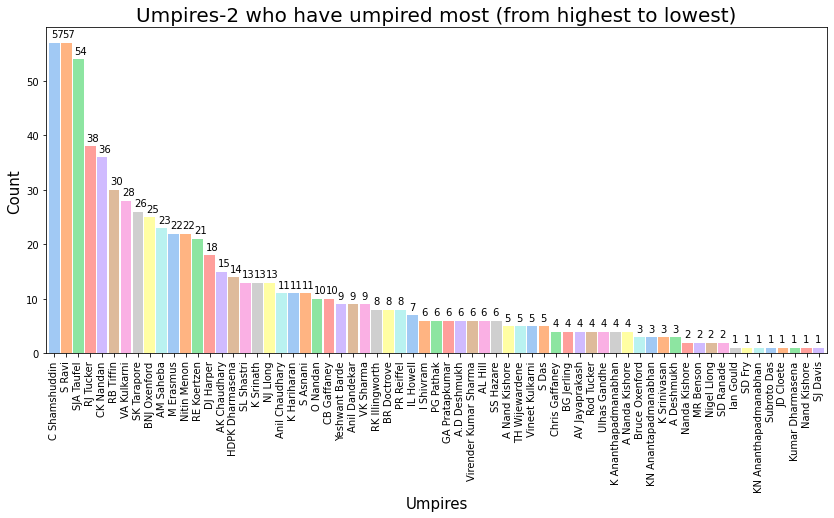

In [11]:
plt.subplots(figsize=(14,6))
ax=matches['umpire2'].value_counts().plot.bar(width=0.9,color=sns.color_palette('pastel',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

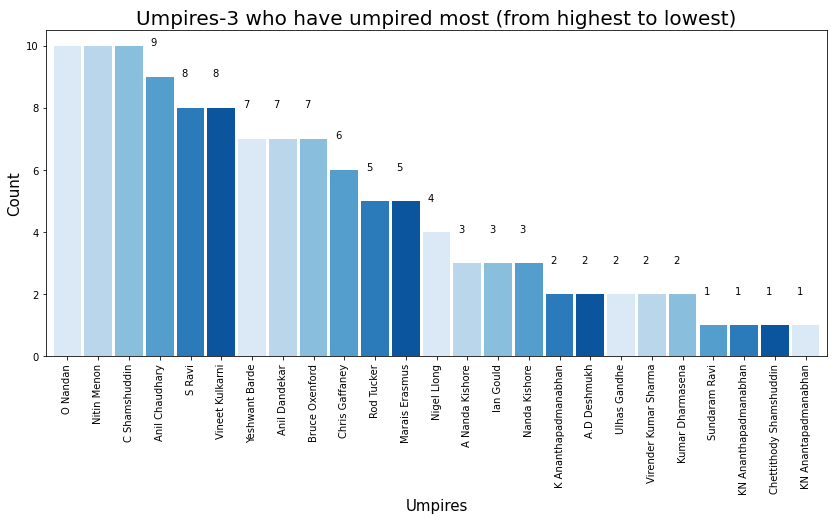

In [12]:
plt.subplots(figsize=(14,6))
ax=matches['umpire3'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

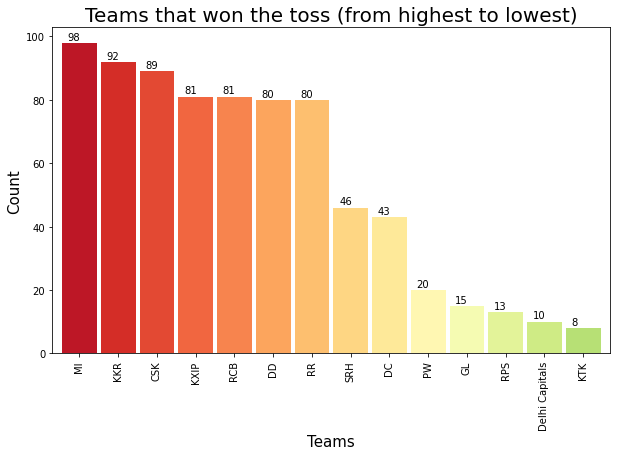

In [13]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Teams that won the toss (from highest to lowest)", fontsize=20)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

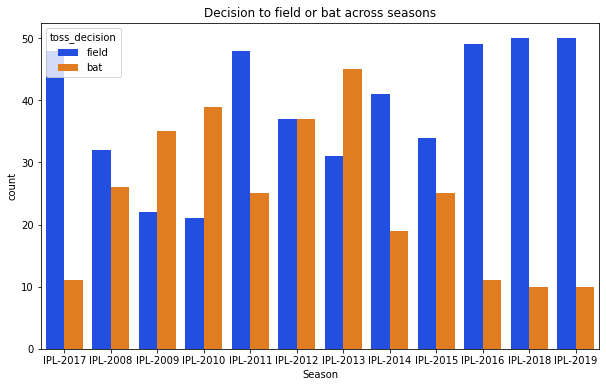

In [14]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Season',hue='toss_decision',data=matches ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()

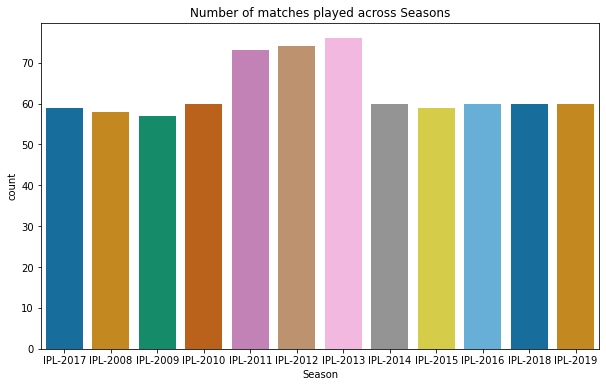

In [15]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Season',data=matches,palette=sns.color_palette('colorblind'))  #countplot automatically counts the frequency of an item
plt.title("Number of matches played across Seasons")
plt.show()

In [16]:
pm = matches.groupby(['player_of_match'])['id'].count().reset_index('player_of_match').rename(columns={'player_of_match':'player','id':'count'})#.sort_values(ascending=False)
pm = pm.sort_values(by="count",ascending=False)
top_pm=pm[:10]

fig = go.Figure(data=[go.Scatter(
    x=top_pm['player'], y=top_pm['count'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)','rgb(92, 65, 54)','rgb(150, 65, 54)','rgb(30, 165, 54)',
              'rgb(100, 180, 120)', 'rgb(200, 90, 89)', 'rgb(225, 78, 124)'],
        opacity=[1, 0.9, 0.8,0.7, 0.6,0.5,0.45,0.4,0.35,0.3],
        size=[100, 90, 80, 70,60,50,40,30,20,10],
    )
)])
fig.update_layout(
    title="Players who recieved 'Player of Match' Award most",
    xaxis=dict(
        title='Players',        
    ),
    yaxis=dict(
        title='Number',       
    ))
fig.show()

In [17]:
print("Total number of Cities played: ",matches['city'].nunique())
print("Total number of Venues played: ",matches['venue'].nunique())

Total number of Cities played:  32
Total number of Venues played:  41


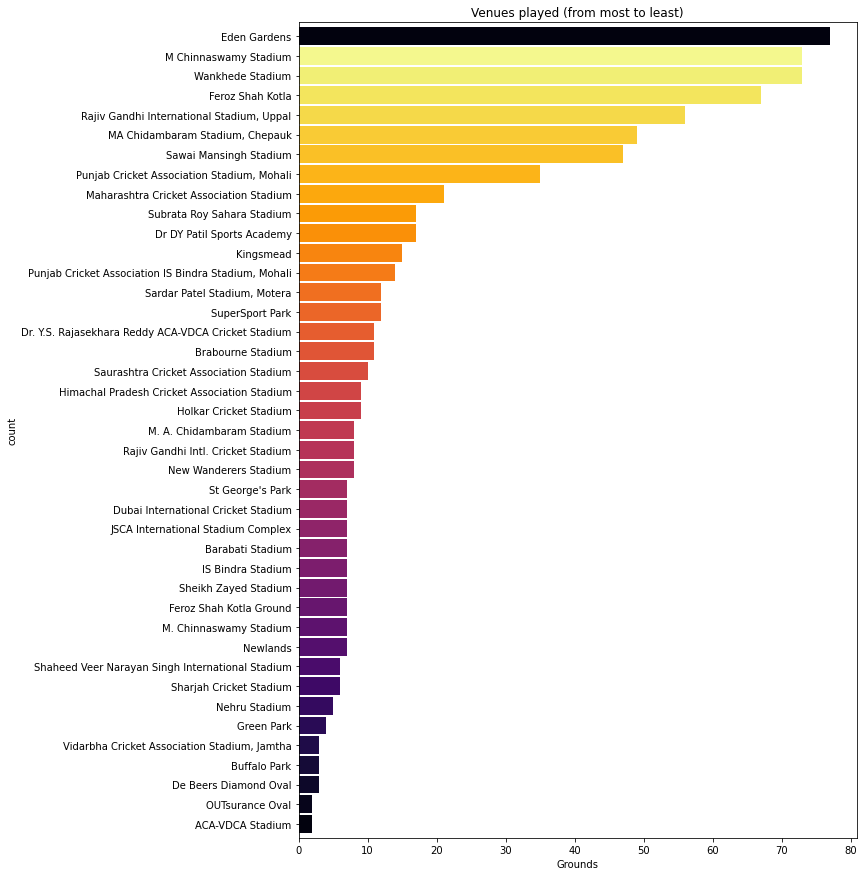

In [18]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("Venues played (from most to least)")
plt.show()

In [19]:
cities = matches.groupby(['Season','city'])['id'].agg('count').reset_index()
cities.rename(columns={'id':'count'}, inplace=True)

fig = px.bar(cities, x="city", y="count", color='Season')
fig.show()

print(matches.columns)

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [20]:
not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/matches.shape[0],2) * 100)
toss_winner = pd.DataFrame({'result':['Yes','No'],'per':[same.shape[0], not_same.shape[0]] })
print("*" * 70)
field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']
print("Percentage of matches where toss decision is 'field': ",round(field.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss decision is 'bat': ",round(bat.shape[0]/matches.shape[0],2) *100)
print("*" * 70)
normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']
no_result = matches[matches['result'] == 'no result']
print("Percentage of matches where result is 'normal': ",round(normal.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'tie': ",round(tie.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'no result': ",round(no_result.shape[0]/matches.shape[0],2) *100)
result = pd.DataFrame({'Result':['Normal','Tie','No Result'],'per':[normal.shape[0], tie.shape[0], no_result.shape[0]] })
print("*" * 70)
dl_applied_no = matches[matches['dl_applied'] == 0]
dl_applied_yes = matches[matches['dl_applied'] == 1]
dl = pd.DataFrame({'dl_applied':['yes','no'],'per':[dl_applied_yes.shape[0], dl_applied_no.shape[0]] })
print("Percentage of matches where Duckworth–Lewis–Stern method (DLS) is applied : ",round(dl_applied_yes.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where Duckworth–Lewis–Stern method (DLS) is not applied : ",round(dl_applied_no.shape[0]/matches.shape[0],2) *100)

fig = px.pie(toss_winner, values='per', names='result', color='result', title='Is Match winner same as toss winner?'
             ,color_discrete_map={'Yes':'#F0FFFF',
                                 'No':'#B0E0E6' })
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
fig = px.pie(dl, values='per', names='dl_applied', title='Percentage of matches where Duckworth–Lewis–Stern method (DLS) is applied', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

labels = result['Result']
values = result['per']
fig = go.Figure(data=[go.Pie(labels=labels,title='Result of matches', values=values, pull=[0, 0.2, 0.1])])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Percentage of matches where toss winner is not same as winner:  48.0
Percentage of matches where toss winner is same as winner:  52.0
**********************************************************************
Percentage of matches where toss decision is 'field':  61.0
Percentage of matches where toss decision is 'bat':  39.0
**********************************************************************
Percentage of matches where result is 'normal':  98.0
Percentage of matches where result is 'tie':  1.0
Percentage of matches where result is 'no result':  1.0
**********************************************************************
Percentage of matches where Duckworth–Lewis–Stern method (DLS) is applied :  3.0
Percentage of matches where Duckworth–Lewis–Stern method (DLS) is not applied :  97.0


In [21]:
matches['date'].min(), matches['date'].max()

(Timestamp('2008-01-05 00:00:00'), Timestamp('2019-12-05 00:00:00'))

In [22]:
teamwise_home_and_away.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
print(teamwise_home_and_away.info())
teamwise_home_and_away.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None


team  home_wins  away_wins  home_matches  away_matches  \
0             RPS          5          5             8             8   
1              MI         58         51           101            86   
2             CSK         51         49            89            75   
3  Delhi Capitals          3          7             6            10   
4             SRH         30         28            63            45   

   home_win_percentage  away_win_percentage  
0            62.500000            62.500000  
1            57.425743            59.302326  
2            57.303371            65.333333  
3            50.000000            70.000000  
4            47.619048            62.222222

In [23]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

In [24]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top15 = most_runs_average_strikerate[:15]

fig = go.Figure()
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['out'],
    name='No. of Matches',
    orientation='h',
    marker=dict(
        color='rgba(80, 100, 67, 0.6)',
        line=dict(color='rgba(8, 1, 212, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['strikerate'],
    name='Strike Rate',
    orientation='h',
    marker=dict(
        color='rgba(8, 1, 212, 0.6)',
        line=dict(color='rgba(8, 1, 212, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['average'],
    name='Average Runs',
    orientation='h',
    marker=dict(
        color='rgba(158, 5, 19, 0.6)',
        line=dict(color='rgba(158, 5, 19, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',title="Players - No. of matches, Strike Rate, Average Runs")
fig.show()

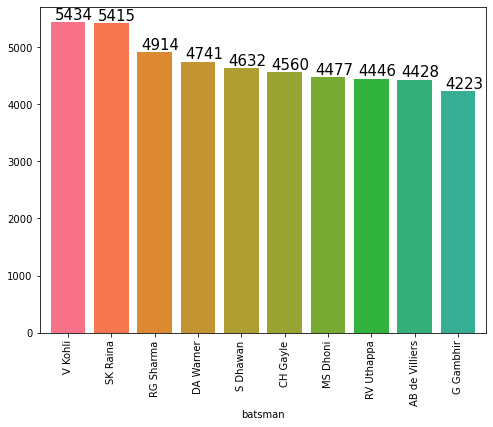

In [26]:
plt.subplots(figsize=(8,6))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]
ax=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

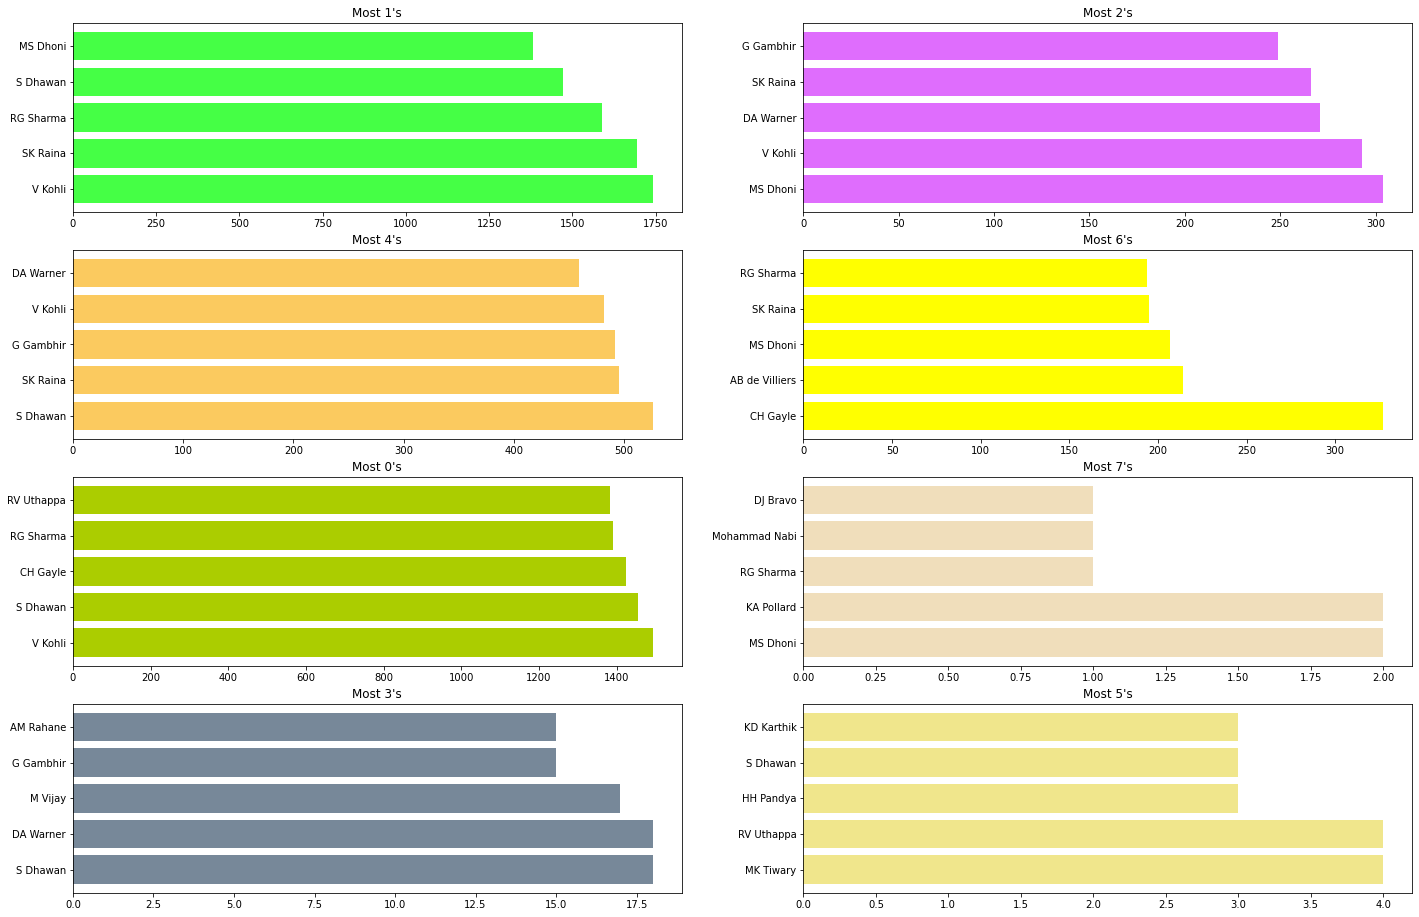

In [27]:
top_batsman = deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(4,2,figsize=(24,16))
top_batsman[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
top_batsman[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
top_batsman[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
top_batsman[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
top_batsman[0].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,0],color='#abcd00',width=0.8)
ax[2,0].set_title("Most 0's")
ax[2,0].set_ylabel('')
top_batsman[7].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,1],color='#f0debb',width=0.8)
ax[2,1].set_title("Most 7's")
ax[2,1].set_ylabel('')
top_batsman[3].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[3,0],color='#778899',width=0.8)
ax[3,0].set_title("Most 3's")
ax[3,0].set_ylabel('')
top_batsman[5].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[3,1],color='#F0E68C',width=0.8)
ax[3,1].set_title("Most 5's")
ax[3,1].set_ylabel('')
plt.show()

In [28]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

match_id         batsman batting_team  batsman_runs
6200        411        CH Gayle          RCB           175
900          60     BB McCullum          KKR           158
8426        562  AB de Villiers          RCB           133
10149      7935         RR Pant           DD           130
9257        620  AB de Villiers          RCB           129
5585        372        CH Gayle          RCB           128
3135        206         M Vijay          CSK           127
529          36       DA Warner          SRH           126
7752        516        V Sehwag         KXIP           122
10417      7953       SR Watson          CSK           121

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



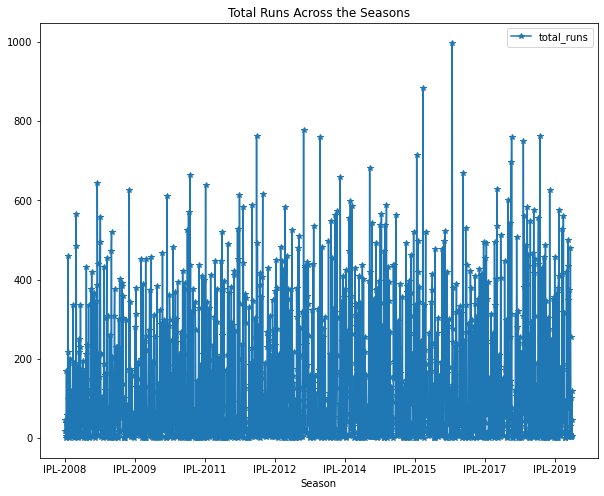

In [29]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['Season','batsman'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



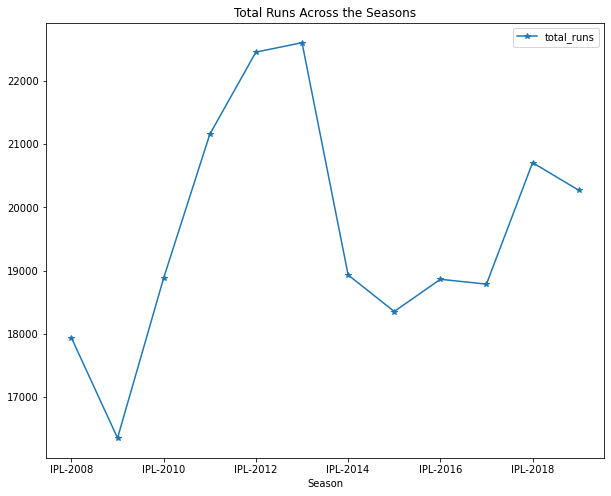

In [30]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



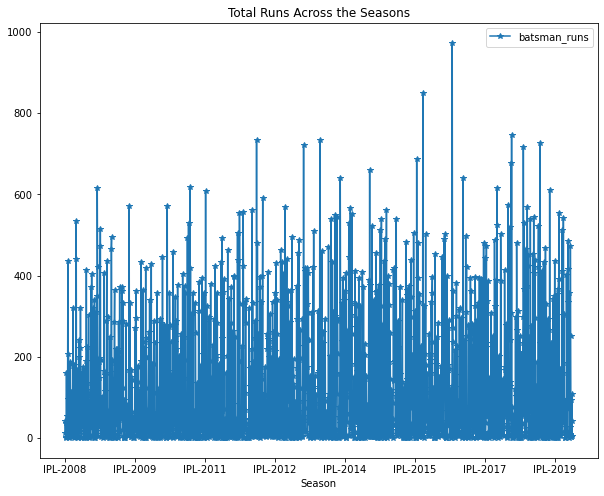

In [31]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
s = season.groupby(['Season','batsman'])['batsman_runs'].sum().unstack().T
season.set_index('Season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



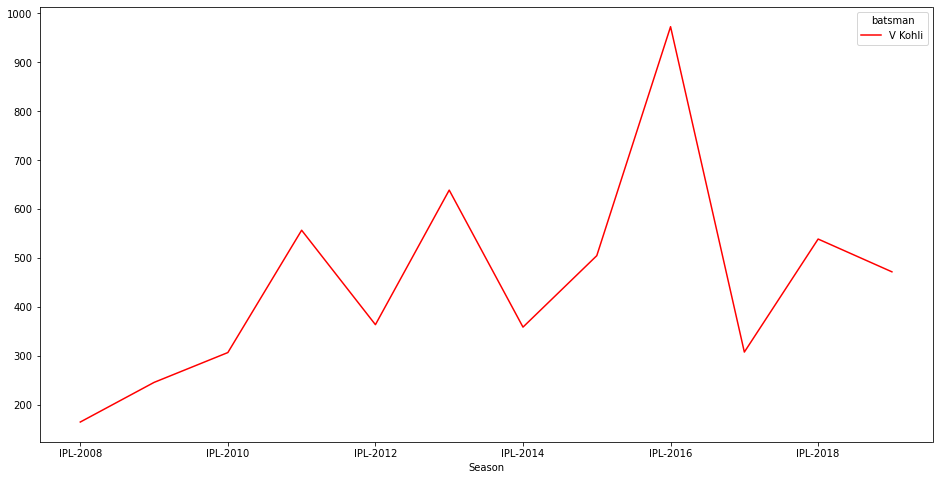

In [32]:
men = batsmen.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['Season','batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis=1)
men = men.sort_values(by='Total',ascending=False)[:1]
men.drop('Total',axis=1,inplace=True)
men.T.plot(color=['red'])
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



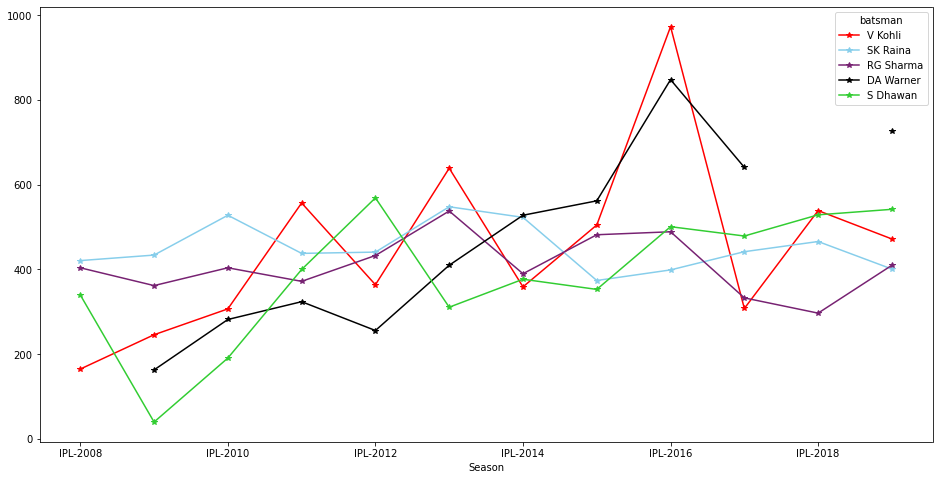

In [33]:
men = batsmen.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['Season','batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis=1)
men = men.sort_values(by='Total',ascending=False)[:5]
men.drop('Total',axis=1,inplace=True)
men.T.plot(color=['red','skyblue','#772272','black','limegreen'],marker='*')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

/home/yogesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



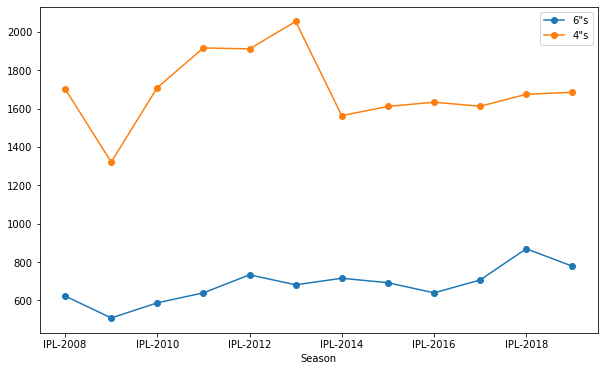

In [34]:
Season_boundaries=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='Season',right_on='Season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('Season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

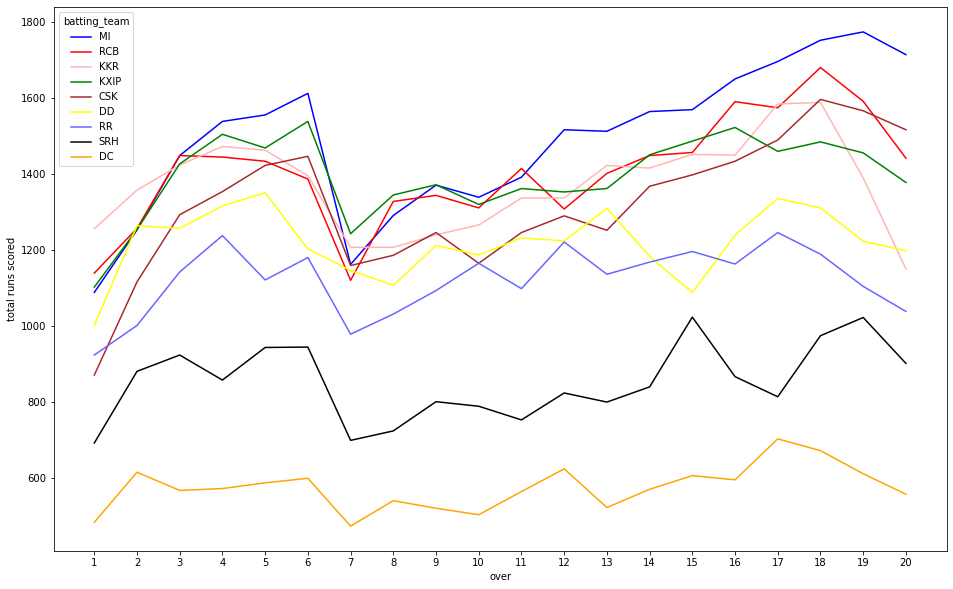

In [35]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["blue", "red", "#Ffb6b2", "green",'brown','yellow','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[x for x in range(1,21,1)]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [36]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

match_id  inning batting_team bowling_team  total_runs
829        411       1          RCB           PW         263
1370      7937       1          KKR         KXIP         250
1250       620       1          RCB           GL         248
416        206       1          CSK           RR         246
1498     11338       1          KKR           MI         241
122         61       1          CSK         KXIP         240
1134       562       1          RCB           MI         235
1426     11147       1          SRH          RCB         233
596        296       1         KXIP          RCB         232
1500     11339       1          SRH         KXIP         232